In [88]:
import pandas as pd
import numpy as np
import math
import copy
import QSTK.qstkutil.qsdateutil as du
import datetime as dt
import QSTK.qstkutil.DataAccess as da
import QSTK.qstkutil.tsutil as tsu
import QSTK.qstkstudy.EventProfiler as ep
import matplotlib.pyplot as plt


dt_start = dt.datetime(2010, 1, 1)
dt_end = dt.datetime(2010, 9, 30)
ldt_timestamps = du.getNYSEdays(dt_start, dt_end, dt.timedelta(hours=16))

dataobj = da.DataAccess('Yahoo')
ls_symbols = ["VZ"]

ls_keys = ['open', 'high', 'low', 'close', 'volume', 'actual_close']
ldf_data = dataobj.get_data(ldt_timestamps, ls_symbols, ls_keys)
d_data = dict(zip(ls_keys, ldf_data))

for s_key in ls_keys:
    d_data[s_key] = d_data[s_key].fillna(method='ffill')
    d_data[s_key] = d_data[s_key].fillna(method='bfill')
    d_data[s_key] = d_data[s_key].fillna(1.0)
df_close = d_data['actual_close']
df_close.columns = ['price']
df_close['mid'] = pd.Series(np.ones((len(df_close),))*np.NaN, index=df_close.index)
df_close['upper'] = pd.Series(np.ones((len(df_close),))*np.NaN, index=df_close.index)
df_close['lower'] = pd.Series(np.ones((len(df_close),))*np.NaN, index=df_close.index)
df_close['indicator'] = pd.Series(np.ones((len(df_close),))*np.NaN, index=df_close.index)

In [94]:
look_back = 20
for i in range(look_back-1,len(df_close)):
    mid = np.mean(df_close['price'].iloc[i-look_back+1:i+1])
    std = np.std(df_close['price'].iloc[i-look_back+1:i+1])
    upper = mid+2*std
    lower = mid-2*std
    df_close['mid'].iloc[i] = mid
    df_close['upper'].iloc[i] = upper
    df_close['lower'].iloc[i] = lower
    df_close['indicator'].iloc[i] = (df_close['price'].iloc[i] - mid) / (std * 2)
#df_close

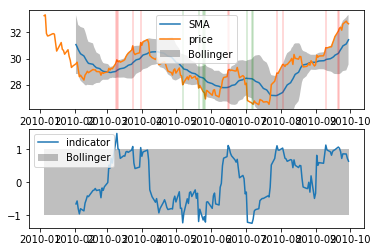

In [95]:
plt.subplot(2,1,1)
plt.plot(ldt_timestamps,df_close['mid'],label="SMA")
plt.fill_between(ldt_timestamps,df_close['lower'],df_close['upper'],where=df_close['upper']>=df_close['lower'],
                 facecolor='gray',label="Bollinger",alpha=0.5)
plt.plot(ldt_timestamps,df_close['price'],label="price")
for x in [d for d in ldt_timestamps if df_close.loc[d]['indicator'] >= 1.0]:
    plt.axvline(x,color='red',linewidth=0.3)
for x in [d for d in ldt_timestamps if df_close.loc[d]['indicator'] <= -1.0]:
    plt.axvline(x,color='green',linewidth=0.3)
plt.legend()

plt.subplot(2,1,2)
plt.plot(ldt_timestamps,df_close['indicator'],label="indicator")
plt.fill_between(ldt_timestamps,-1,1,where=1>=-1,
                 facecolor='gray',label="Bollinger",alpha=0.5)
plt.legend()


plt.show()